<h1><center>Online Job Posting</center></h1>
<br>  
<div>
<img src="https://www.betterteam.com/images/betterteam-free-job-posting-sites-5877x3918-20210222.jpg?crop=4:3,smart&width=1200&dpr=2" 
width="300"/>   
</div>

#  I. Introduction 
## Dataset Overview
This dataset consists of 19,000 job postings from 2004 to 2015 posted on CareerCenter, an Armenian human resource portal.

Since postings are text documents and tend to have similar structures, text mining can be used to extract features like posting date, job title, company name, job description, salary, and more. Postings that had no structure or were not job-related were removed. The data was originally scraped from a Yahoo! mailing group.


The dataset is from [kaggle's](https://www.kaggle.com/udacity/armenian-online-job-postings)

 ## Outlines

The rest of this report will focus on applying the data wrangling step, which is part of the data analysis process, on the dataset under investigation. The data wrangling step consists of three main steps as follows:
1. **Gathering** 
2. **Assessing** 
3. **Cleaning** 

# II. Data Wrangling

In [1]:
# import libraries 

import zipfile
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## 1. Gathering 

+ Download the file from [kaggle's](https://www.kaggle.com/udacity/armenian-online-job-postings)
+ Unzip the download zip file programtically

In [2]:
# Extract all contents from zip file
with zipfile.ZipFile('archive.zip', 'r') as myzip:
    myzip.extractall()

In [3]:
# load dataset
df = pd.read_csv("online-job-postings.csv")

## 2. Assessing

In [4]:
df

,jobpost,date,Title,Company,AnnouncementCode,Term,Eligibility,Audience,StartDate,Duration,...,Salary,ApplicationP,OpeningDate,Deadline,Notes,AboutC,Attach,Year,Month,IT
0,AMERIA Investment Consulting Company\r\nJOB TI...,"Jan 5, 2004",Chief Financial Officer,AMERIA Investment Consulting Company,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,"To apply for this position, please submit a\r\...",NaN,26 January 2004,NaN,NaN,NaN,2004,1,False
1,International Research & Exchanges Board (IREX...,"Jan 7, 2004",Full-time Community Connections Intern (paid i...,International Research & Exchanges Board (IREX),NaN,NaN,NaN,NaN,NaN,3 months,...,NaN,Please submit a cover letter and resume to:\r\...,NaN,12 January 2004,NaN,The International Research & Exchanges Board (...,NaN,2004,1,False
2,Caucasus Environmental NGO Network (CENN)\r\nJ...,"Jan 7, 2004",Country Coordinator,Caucasus Environmental NGO Network (CENN),NaN,NaN,NaN,NaN,NaN,Renewable annual contract\r\nPOSITION,...,NaN,Please send resume or CV toursula.kazarian@......,NaN,20 January 2004\r\nSTART DATE: February 2004,NaN,The Caucasus Environmental NGO Network is a\r\...,NaN,2004,1,False
3,Manoff Group\r\nJOB TITLE: BCC Specialist\r\n...,"Jan 7, 2004",BCC Specialist,Manoff Group,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,Please send cover letter and resume to Amy\r\n...,NaN,23 January 2004\r\nSTART DATE: Immediate,NaN,NaN,NaN,2004,1,False
4,Yerevan Brandy Company\r\nJOB TITLE: Software...,"Jan 10, 2004",Software Developer,Yerevan Brandy Company,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,Successful candidates should submit\r\n- CV; \...,NaN,"20 January 2004, 18:00",NaN,NaN,NaN,2004,1,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18996,Technolinguistics NGO\r\n\r\n\r\nTITLE: Senio...,"Dec 28, 2015",Senior Creative UX/ UI Designer,Technolinguistics NGO,NaN,Full-time,NaN,NaN,NaN,Long-term,...,Competitive,"To apply for this position, please send your\r...",29 December 2015,28 January 2016,NaN,As a company Technolinguistics has a mandate t...,NaN,2015,12,False
18997,"""Coca-Cola Hellenic Bottling Company Armenia"" ...","Dec 30, 2015",Category Development Manager,"""Coca-Cola Hellenic Bottling Company Armenia"" ...",NaN,Full-time,All interested professionals.,NaN,ASAP,Long-term with a probation period of 3 months.,...,NaN,All interested candidates are kindly requested...,30 December 2015,20 January 2016,NaN,NaN,NaN,2015,12,False
18998,"""Coca-Cola Hellenic Bottling Company Armenia"" ...","Dec 30, 2015",Operational Marketing Manager,"""Coca-Cola Hellenic Bottling Company Armenia"" ...",NaN,Full-time,All interested professionals.,NaN,ASAP,Long-term with a probation period of 3 months.,...,NaN,All interested candidates are kindly requested...,30 December 2015,20 January 2016,NaN,NaN,NaN,2015,12,False
18999,San Lazzaro LLC\r\n\r\n\r\nTITLE: Head of O...,"Dec 30, 2015",Head of Online Sales Department,San Lazzaro LLC,NaN,NaN,NaN,NaN,NaN,Long-term,...,Highly competitive,Interested candidates can send their CVs to:\r...,30 December 2015,29 January 2016,NaN,San Lazzaro LLC works with several internation...,NaN,2015,12,False


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19001 entries, 0 to 19000
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   jobpost           19001 non-null  object
 1   date              19001 non-null  object
 2   Title             18973 non-null  object
 3   Company           18994 non-null  object
 4   AnnouncementCode  1208 non-null   object
 5   Term              7676 non-null   object
 6   Eligibility       4930 non-null   object
 7   Audience          640 non-null    object
 8   StartDate         9675 non-null   object
 9   Duration          10798 non-null  object
 10  Location          18969 non-null  object
 11  JobDescription    15109 non-null  object
 12  JobRequirment     16479 non-null  object
 13  RequiredQual      18517 non-null  object
 14  Salary            9622 non-null   object
 15  ApplicationP      18941 non-null  object
 16  OpeningDate       18295 non-null  object
 17  Deadline    

In [6]:
df['StartDate'].value_counts()

ASAP                      4754
Immediately                773
As soon as possible        543
Upon hiring                261
Immediate                  259
                          ... 
October                      1
08 October 2012              1
20 October 2015              1
20 September 2006            1
June 2005 or as agreed       1
Name: StartDate, Length: 1186, dtype: int64

### Assessing Summary
- Missing values (NaN)
- StartDate inconsistencies (ASAP) 
- Nondescriptive column headers (JobRequirment, RequiredQual, ApplicationP, AboutC) 
- The dataset is not tidy (messy)
    - Duplicate representation of data (date column with Year and Month having their own columns)
    - There are two types of observational units (job posting data and company data)

## 3. Cleaning

#### Issue 1 Define:

- Select all nondescriptive and misspelled column headers (JobRequirment, RequiredQual, ApplicationP, AboutC) and replace them with full words (JobRequirement, RequiredQualifications, ApplicationProcedure, AboutCompany)

#### Code

In [7]:
df_clean = df.copy()
df_clean = df_clean.rename(columns={'JobRequirment': 'JobRequirement',
                                    'RequiredQual': 'RequiredQualifications',
                                    'ApplicationP':'ApplicationProcedure',
                                    'AboutC':'AboutCompany'})

# test: check to confirm last step 
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19001 entries, 0 to 19000
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   jobpost                 19001 non-null  object
 1   date                    19001 non-null  object
 2   Title                   18973 non-null  object
 3   Company                 18994 non-null  object
 4   AnnouncementCode        1208 non-null   object
 5   Term                    7676 non-null   object
 6   Eligibility             4930 non-null   object
 7   Audience                640 non-null    object
 8   StartDate               9675 non-null   object
 9   Duration                10798 non-null  object
 10  Location                18969 non-null  object
 11  JobDescription          15109 non-null  object
 12  JobRequirement          16479 non-null  object
 13  RequiredQualifications  18517 non-null  object
 14  Salary                  9622 non-null   object
 15  Ap

#### Issue 2 Define:

- Select all records in the StartDate column that have "As soon as possible", "Immediately", etc. and replace the text in those cells with "ASAP"

In [8]:
asap_list = ['Immediately', 'As soon as possible', 'Upon hiring',
             'Immediate', 'Immediate employment', 'As soon as possible.', 'Immediate job opportunity',
             '"Immediate employment, after passing the interview."',
             'ASAP preferred', 'Employment contract signature date',
             'Immediate employment opportunity', 'Immidiately', 'ASA',
             'Asap', '"The position is open immediately but has a flexible start date depending on the candidates earliest availability."',
             'Immediately upon agreement', '20 November 2014 or ASAP',
             'immediately', 'Immediatelly',
             '"Immediately upon selection or no later than November 15, 2009."',
             'Immediate job opening', 'Immediate hiring', 'Upon selection',
             'As soon as practical', 'Immadiate', 'As soon as posible',
             'Immediately with 2 months probation period',
             '12 November 2012 or ASAP', 'Immediate employment after passing the interview',
             'Immediately/ upon agreement', '01 September 2014 or ASAP',
             'Immediately or as per agreement', 'as soon as possible',
             'As soon as Possible', 'in the nearest future', 'immediate',
             '01 April 2014 or ASAP', 'Immidiatly', 'Urgent',
             'Immediate or earliest possible', 'Immediate hire',
             'Earliest  possible', 'ASAP with 3 months probation period.',
             'Immediate employment opportunity.', 'Immediate employment.',
             'Immidietly', 'Imminent', 'September 2014 or ASAP', 'Imediately']

for phrase in asap_list:
    df_clean.StartDate.replace( phrase, 'ASAP', inplace=True)
    

# test: check to confirm last step 
df_clean['StartDate'].value_counts()

ASAP                      6856
01 September 2012           31
March 2006                  27
November 2006               22
January 2010                19
                          ... 
15 June 2013                 1
Early 2006                   1
02\r\nNovember 201           1
October                      1
June 2005 or as agreed       1
Name: StartDate, Length: 1140, dtype: int64

In [9]:
# check that all the phrases in the 'asap_list' are no longer in our dataframe 
for phrase in asap_list:
    assert phrase not in df_clean['StartDate'].values

The following line of code will give an AssertionError, since 'ASAP' is in our dataframe\
`assert 'ASAP' not in df_clean['StartDate'].values`

## Analysis and Visualizations

In [10]:
# number of 'ASAP' start dates
asap_counts = df_clean.StartDate.value_counts()['ASAP']

# number of non-empty start dates 
non_empty_counts = df_clean.StartDate.count()

# percentage of position with argent start date 'ASAP'
asap_counts/non_empty_counts

0.7086304909560723

C:\Users\Esraa\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 13 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Esraa\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 13 missing from current font.
  font.set_text(s, 0, flags=flags)


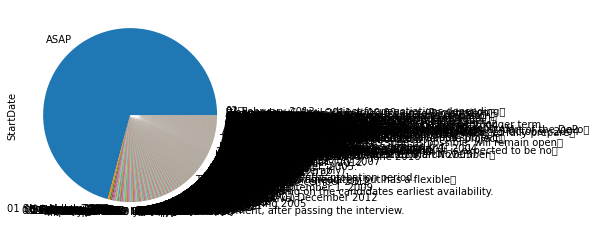

In [11]:
df_clean.StartDate.value_counts().plot(kind='pie');

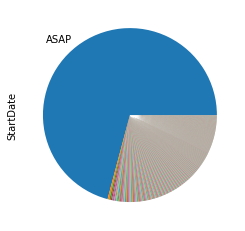

In [12]:
# to remove all the labels of the pie chart and keep only 'ASAP'
labels = np.full(len(df_clean.StartDate.value_counts()), '', dtype=object)
labels[0] = 'ASAP'
df_clean.StartDate.value_counts().plot(kind='pie', labels=labels);

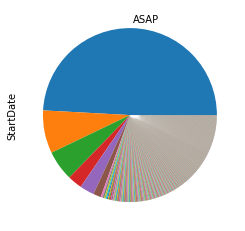

In [13]:
# same step on original dataset 

labels = np.full(len(df.StartDate.value_counts()), '', dtype=object)
labels[0] = 'ASAP'
df.StartDate.value_counts().plot(kind='pie', labels=labels);